# 평가

![image](https://user-images.githubusercontent.com/70187490/127277046-16f05508-5dcd-4b79-9854-c624cac619bb.png)


- 분류의 성능평가 지표
    - 정확도( Accuracy )
    - 오차행렬( Confusion Matrix )
    - 정밀도( Precision )
    - 재현률( Recall )
    - F1 스코어
    - ROC AUC

## 1. 정확도(Accuracy)

- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
$$Accuracy = \frac{Number \ of \ correct \ prediction}{Total \ number \ of \ prediction}$$

- 가장 직관적인 모델 예측 성능 평가 지표지만, 정확도 수치 하나만 가지고 성능을 평가하지 않음
- 타이타닉과 같은 경우 별다른 알고리즘의 적용없이 무조건 여자면 생존으로 예측해도 높은 정확도가 나올 수 있음
    > 성별 하나만으로 결정하는 단순한 알고리즘도 높은 정확도를 나타내는 상황이 발생

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict( ) 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        
        return pred

- 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성
    - 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있음
    
<br>

위의 생성한 MyDummyClassifier 클래스는 
- 학습을 수행하는 fit( ) 메서드는 아무것도 수행하지 않으며
- 예측을 수행하는 predict( ) 메소드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측

In [2]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


MNIST 데이터 세트를 변환해 불균현한 데이터 세트로 만든 뒤에 정확도 지표 적용시 문제 발생되는 예시
- 레이블 값이 7인것만이 True, 나머지 값은 모두 False로 변환해 이진 분류로 자료를 변환
> 즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형 데이터 세트로 변형

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사이킷런의 내장 데이터 세트인 load_digits( )을 이용해 MNIST 데이터 로딩
digits = load_digits( )

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state= 11 )

단순한 알고리즘 제작
- 단순히 predict의 결과를 np.zeros( )로 모두 0값으로 반환하는 클래스 생성
- fit( )단계에서 학습을 하지 않음

In [5]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X),1), dtype=bool )

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


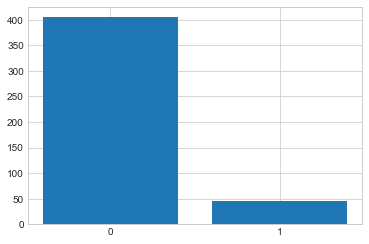

In [6]:
# 불균형한 레이블 데이터 분포도 확인
dist = pd.Series(y_test).value_counts()
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(dist)

plt.style.use(['seaborn-whitegrid'])
plt.bar([0,1], dist.values)
plt.xticks([0,1], [0,1]);

In [7]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


- 이렇게 불균형한 데이터 세트에서 모든 데이터를 Flase, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 90%에 가까운 예측 정확도를 나타냄
    - 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점
    
> 이러한 정확도가 가지는 분류 평가 지표로서 한계점을 극복하기 위해선 여러가지 분류 지표와 함께 적용해야 함

## 오차행렬
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
- 오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는 지를 알수 있음

![image](https://user-images.githubusercontent.com/70187490/127271611-443adf08-1e59-405a-8ed8-00a434f13ca9.png)


- TN, FP, FN, TP 기호가 의미하는 것은 
    - 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미
    - 뒤 문자 Negative/Positive는 예측 결과값이 부정(0)/긍정(1)을 의미

<br>

* TN은 예측값으로 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP는 예측값으로 Positive 값 1으로 예측했고 실제 값은 Negative 값 0
* FN은 예측값으로 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
* TP는 예측값으로 Positive 값 1으로 예측했고 실제 값도 Positive 값 1

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix( ) API를 제공함  
- 출력된 오차 행렬은 ndarray형태로 출력함
- 즉, TN은 array[0,0]으로 405
- FP는 array[0,1]으로 0
- FN은 array[1,0]으로 45
- TP는 array[1,1]으로 0 에 해당됨

In [8]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, fakepred)
conf_mat

array([[405,   0],
       [ 45,   0]], dtype=int64)

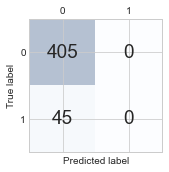

In [9]:

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', fontsize=19 )
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

오차행렬의 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인
* 정확도(Accuracy)
* 정밀도(Precision)
* 재현율(Recall)  
값을 구할 수 있다.

정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정됨  
&nbsp;&nbsp;&nbsp;&nbsp;즉, 오차행렬에서 True에 해당하는 TN과 TP에 좌우  

정확도$= \frac{TN + TP}{TN+TP+FP+FN}$

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 postive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0 값을 부여하는 경우가 많음
> 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됌

## 정밀도와 재현율

![image](https://user-images.githubusercontent.com/70187490/127277046-16f05508-5dcd-4b79-9854-c624cac619bb.png)

- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표  
$$precision= \frac{TP}{FP+TP}$$
$$recall= \frac{TP}{FN+TP}$$
- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    - 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표

<br>

- 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    - 민감도라고도 불림

- 재현율이 중요한 경우:  
 **실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
        - 실제 Positive인 암환자를 Negative음성으로 잘못 판단할 경우
        - 금융거리 사기인 Positive인 거래를 Negative로 잘못 판단한 경우
- 정밀도가 중요한 경우:  
 **실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
        - 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만
- 재현율은 FN(실제 Positive, 예측 Negative)
- 정밀도는 FP(실제 Negative, 예측 Positive) 를 낮추는데 초점

<br>

사이킷런은 
- 정밀도 계산을 위해 precision_score( )
- 재현율 계산을 위해 recall_score( ) 을 API로 제공

In [10]:
# 평가를 간편하게 적용하기 위해서 confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수

def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    import matplotlib.pyplot as plt
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout();

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\Jun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


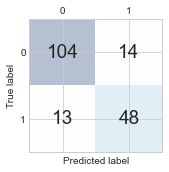

In [11]:
# 로지스틱 회귀 기반으로 타아타닉 생존자 예측 후 평가 지표 출력

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression( )

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

**정밀도/재현율 트레이드 오프**
- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치가 떨어지기 쉬움
    - 정밀도/재현율의 트레이드오프(Trade-off)
    
<br>

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공
- predict_proba( )메소드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함
- predict와 비슷하지만 반환 결과가 예측 결과 확률


In [16]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 파악
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.46197701 0.53802299]
 [0.87868649 0.12131351]
 [0.87716331 0.12283669]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197701 0.53802299 1.        ]
 [0.87868649 0.12131351 0.        ]
 [0.87716331 0.12283669 0.        ]]


threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성.  
- 생성된 Binarizer 객체의 fit_transform( ) 메서드를 이용해 ndarray를 입력하면  
- 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로 크면 1값으로 변환해 반환함

In [17]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))
# 입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


LogisticRegression객체의 predict_proba( ) 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에  
분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer클래스를 적용해 최종 예측값을 구하는 예제

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


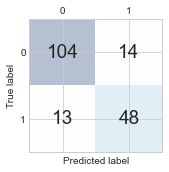

In [20]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold =0.5

# predict_proba( ) 반환값의 두 번째 컬럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

In [21]:
# 162page